1. INSTALL FASTAPI UVICORN

In [ ]:
!pip install fastapi uvicorn

1.1 IMPORT LIBRARY

In [ ]:
import uvicorn
from fastapi import FastAPI

2. CREATE APP OBJECT

In [ ]:
app= FastAPI()

index route, opens automatically on htttp://127.0.0.1:8000

In [ ]:
@app.get('/')
def index():
  return {'message': 'hello dear leaders in goup 5'}

4. Route with a single parameter, returns the parameter within a message located at: http://127.0.0.1:8000/AnyNameHere

In [ ]:
@app.get('/welcome')
def get_name (name: str):
    return {'welcome to AI_ML_and_BigData_Analytics', f'{name}'}

5. RUN THE API WITH UVICORN
   will run on http://127.0.0.1:8000

In [ ]:
import uvicorn
from fastapi import FastAPI

app = FastAPI()

if __name__ == "__main__":
    uvicorn.run(app, host="127.0.0.1", port=8000)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

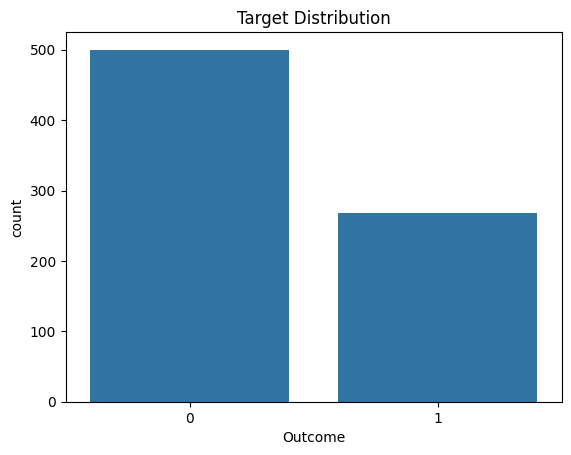

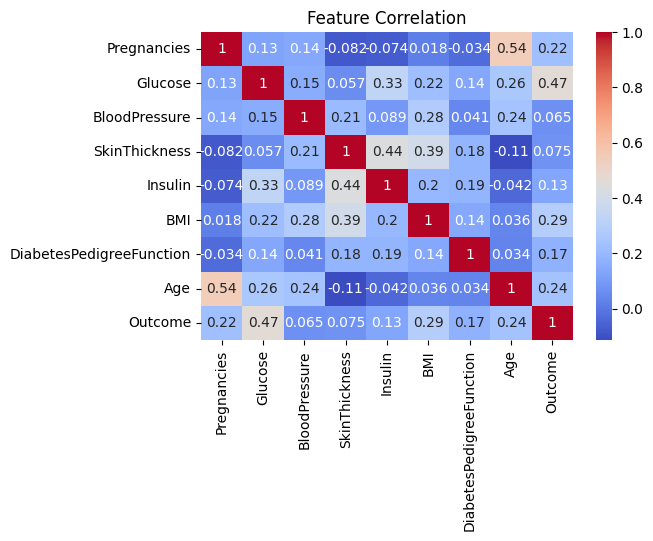

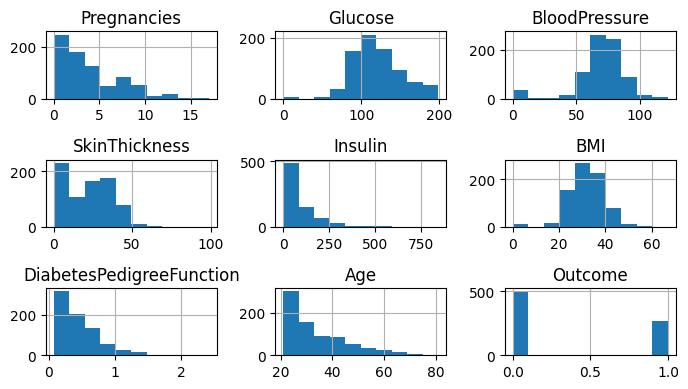

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("/content/drive/MyDrive/dataset/diabetes.csv")

# Basic info
print(df.info())
print(df.describe())

# Target distribution
sns.countplot(x="Outcome", data=df)
plt.title("Target Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

# Feature distributions
df.hist(figsize=(7, 4))
plt.tight_layout()
plt.show()


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# src/train.py

import os
import joblib
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# -----------------------------
# Configuration
# -----------------------------
DATA_PATH = "/content/drive/MyDrive/dataset/diabetes.csv"
MODEL_DIR = "models_ImprovedOne"
TARGET_COLUMN = "Outcome"
RANDOM_STATE = 42


def load_data(path: str):
    """Load dataset"""
    if not os.path.exists(path):
        raise FileNotFoundError(f"Dataset not found at {path}")

    df = pd.read_csv(path)
    X = df.drop(TARGET_COLUMN, axis=1)
    y = df[TARGET_COLUMN]
    return X, y


def build_models():
    """Define candidate models"""
    return {
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "RandomForest": RandomForestClassifier(
            n_estimators=200,
            random_state=RANDOM_STATE
        ),
        "SVM": SVC(kernel="rbf", probability=True)
    }


def train_and_select_best_model(X, y):
    """
    Train models using cross-validation
    and select the best one
    """
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    models = build_models()

    best_score = 0
    best_model = None
    best_model_name = None

    for name, model in models.items():
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("model", model)
        ])

        scores = cross_val_score(
            pipeline,
            X,
            y,
            cv=cv,
            scoring="accuracy"
        )

        mean_score = scores.mean()
        print(f"{name} CV Accuracy: {mean_score:.4f}")

        if mean_score > best_score:
            best_score = mean_score
            best_model = pipeline
            best_model_name = name

    print("\nBest Model Selected:", best_model_name)
    print("Best CV Accuracy:", round(best_score, 4))

    return best_model, best_model_name


def evaluate_model(model, X, y):
    """Final hold-out evaluation"""
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=RANDOM_STATE,
        stratify=y
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    accuracy = accuracy_score(y_test, preds)
    print("Test Accuracy:", round(accuracy, 4))

    return model


def save_model(model, model_name):
    """Save trained model"""
    os.makedirs(MODEL_DIR, exist_ok=True)

    model_path = os.path.join(MODEL_DIR, "best_model.pkl")
    joblib.dump(model, model_path)

    print(f"Model saved to {model_path}")
    print(f"Model type: {model_name}")


def main():
    print("Loading data...")
    X, y = load_data(DATA_PATH)

    print("Training and selecting best model...")
    best_model, best_model_name = train_and_select_best_model(X, y)

    print("Evaluating best model...")
    trained_model = evaluate_model(best_model, X, y)

    print("Saving model...")
    save_model(trained_model, best_model_name)

    print("Training pipeline completed successfully ✅")


if __name__ == "__main__":
    main()



Loading data...
Training and selecting best model...
LogisticRegression CV Accuracy: 0.7747
RandomForest CV Accuracy: 0.7630
SVM CV Accuracy: 0.7617

Best Model Selected: LogisticRegression
Best CV Accuracy: 0.7747
Evaluating best model...
Test Accuracy: 0.7143
Saving model...
Model saved to models_ImprovedOne/best_model.pkl
Model type: LogisticRegression
Training pipeline completed successfully ✅
